In [1]:
!pip3 install -q --upgrade pip
!pip3 install -q pandas numpy matplotlib seaborn openpyxl climateserv requests netCDF4 xarray pyproj

In [2]:
import os
import pandas as pd
import numpy as np
from itertools import product
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

import sys
from pathlib import Path

# Calculate the path to the scripts folder relative to the current notebook.
scripts_dir = Path("../../").resolve()

# Add the scripts directory to the sys.path if it's not already there.
if str(scripts_dir) not in sys.path:
    sys.path.append(str(scripts_dir))

import pandas as pd
from scripts.preprocessing.british_geological_survey import find_closest_points

In [6]:
british_df = pd.read_csv('../../data/processed_data/british_geological_survey_africa/combined_data_filled.csv')
british_df

,X,Y,DepthToGroundwater,GroundwaterProductivity,GroundwaterStorage
0,-16.775,13.061,7-25,NaN,NaN
1,-16.775,13.111,7-25,NaN,NaN
2,-16.775,13.161,7-25,NaN,NaN
3,-16.775,13.211,7-25,NaN,NaN
4,-16.775,13.261,7-25,NaN,NaN
...,...,...,...,...,...
2666,-13.786,13.731,25-50,>20,">50,000"
2667,-13.786,13.751,25-50,>20,">50,000"
2668,-13.786,13.781,25-50,>20,">50,000"
2669,-13.786,13.801,25-50,>20,">50,000"


In [5]:
df = pd.read_csv("../../data/final_dataset/processed_data/merged_data.csv")
df

,long,lat,Drainage_density,Slope_tif2,Hydrogeo,Curvatu_tif2,NASADEM_HGT
0,-16.670616,13.488346,13.499496,0.000000,5.0,-0.000000e+00,0.0
1,-16.665998,13.488376,14.573664,0.000000,5.0,-0.000000e+00,0.0
2,-16.684438,13.483734,15.609715,0.000000,5.0,-0.000000e+00,0.0
3,-16.679820,13.483765,13.571120,0.000000,5.0,-0.000000e+00,0.0
4,-16.675202,13.483796,13.922873,0.000000,5.0,-0.000000e+00,0.0
...,...,...,...,...,...,...,...
2869,-16.746177,13.076569,34.977886,1.642019,5.0,2.592000e+09,9.0
2870,-16.741567,13.076600,44.632805,2.321531,5.0,-5.184000e+09,2.0
2871,-16.736957,13.076631,49.922588,2.706814,5.0,3.888000e+09,2.0
2872,-16.732347,13.076662,49.457001,0.734494,5.0,-3.888000e+09,3.0


In [7]:
from scipy.spatial import cKDTree
import pandas as pd
# Ensure the column names for latitude and longitude are consistent

# Rename columns for consistency if needed
british_df.rename(columns={'X': 'long', 'Y': 'lat'}, inplace=True)

# Build a KDTree for efficient nearest neighbor search
tree = cKDTree(british_df[['lat', 'long']])

# New column to store DepthToGroundwater values
df['DepthToGroundwater'] = None

# Iterate over each row in df to find the nearest neighbor in british_df
for index, row in df.iterrows():
    # Query the tree for the nearest neighbor
    _, nearest_idx = tree.query([row['lat'], row['long']], k=1)
    
    # Get the DepthToGroundwater value of the nearest neighbor
    nearest_depth_to_groundwater = british_df.iloc[nearest_idx]['DepthToGroundwater']
    
    # Assign the value to the new column in df
    df.at[index, 'DepthToGroundwater'] = nearest_depth_to_groundwater

    # Optional: print progress
    print(f"Processed row {index + 1}/{len(df)}")

# df now has the new column 'DepthToGroundwater' populated with values


Processed row 1/2874
Processed row 2/2874
Processed row 3/2874
Processed row 4/2874
Processed row 5/2874
Processed row 6/2874
Processed row 7/2874
Processed row 8/2874
Processed row 9/2874
Processed row 10/2874
Processed row 11/2874
Processed row 12/2874
Processed row 13/2874
Processed row 14/2874
Processed row 15/2874
Processed row 16/2874
Processed row 17/2874
Processed row 18/2874
Processed row 19/2874
Processed row 20/2874
Processed row 21/2874
Processed row 22/2874
Processed row 23/2874
Processed row 24/2874
Processed row 25/2874
Processed row 26/2874
Processed row 27/2874
Processed row 28/2874
Processed row 29/2874
Processed row 30/2874
Processed row 31/2874
Processed row 32/2874
Processed row 33/2874
Processed row 34/2874
Processed row 35/2874
Processed row 36/2874
Processed row 37/2874
Processed row 38/2874
Processed row 39/2874
Processed row 40/2874
Processed row 41/2874
Processed row 42/2874
Processed row 43/2874
Processed row 44/2874
Processed row 45/2874
Processed row 46/28

In [8]:
df

,long,lat,Drainage_density,Slope_tif2,Hydrogeo,Curvatu_tif2,NASADEM_HGT,DepthToGroundwater
0,-16.670616,13.488346,13.499496,0.000000,5.0,-0.000000e+00,0.0,0-7
1,-16.665998,13.488376,14.573664,0.000000,5.0,-0.000000e+00,0.0,0-7
2,-16.684438,13.483734,15.609715,0.000000,5.0,-0.000000e+00,0.0,0-7
3,-16.679820,13.483765,13.571120,0.000000,5.0,-0.000000e+00,0.0,0-7
4,-16.675202,13.483796,13.922873,0.000000,5.0,-0.000000e+00,0.0,0-7
...,...,...,...,...,...,...,...,...
2869,-16.746177,13.076569,34.977886,1.642019,5.0,2.592000e+09,9.0,0-7
2870,-16.741567,13.076600,44.632805,2.321531,5.0,-5.184000e+09,2.0,0-7
2871,-16.736957,13.076631,49.922588,2.706814,5.0,3.888000e+09,2.0,0-7
2872,-16.732347,13.076662,49.457001,0.734494,5.0,-3.888000e+09,3.0,0-7


In [9]:
nan_counts = df.isna().sum()
print("NaN Counts in each column:\n", nan_counts)

NaN Counts in each column:
 long                  0
lat                   0
Drainage_density      0
Slope_tif2            0
Hydrogeo              0
Curvatu_tif2          0
NASADEM_HGT           0
DepthToGroundwater    0
dtype: int64


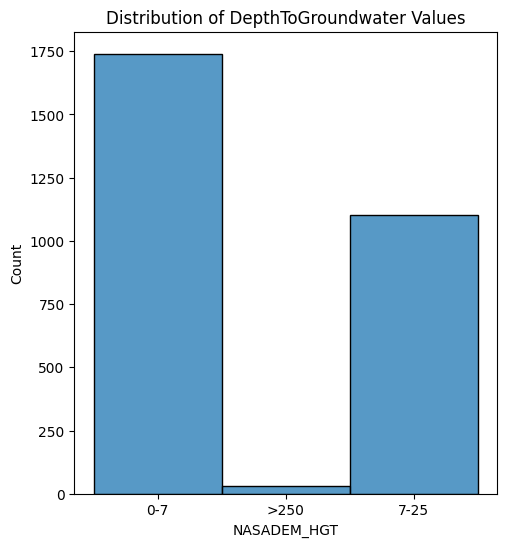

In [10]:
import seaborn as sns
def plot_nasadem_hgt_distribution(df):
    """
    Plots the distribution of NASADEM_HGT values in the DataFrame.

    Args:
        df (pd.DataFrame): DataFrame containing NASADEM_HGT values.
    """
    # Set up the matplotlib figure
    plt.figure(figsize=(12, 6))

    # Histogram of NASADEM_HGT values excluding NaNs
    plt.subplot(1, 2, 1)
    sns.histplot(df['DepthToGroundwater'].dropna(), kde=False, bins=50)
    plt.title('Distribution of DepthToGroundwater Values')
    plt.xlabel('NASADEM_HGT')
    plt.ylabel('Count')

# Call the function with your DataFrame
plot_nasadem_hgt_distribution(df)

In [11]:
def save_data(merged_df: pd.DataFrame, save_path: str) -> None:
    """Save the merged data to a CSV file."""
    merged_df.to_csv(save_path, index=False)
save_data(merged_df=df, save_path='../../data/final_dataset/processed_data/merged_data.csv')